In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set()

In [2]:
data =pd.read_csv('dataset/anujonthemove-auto-insurance-in-sweden/data/auto_insurance_sweden.csv')

In [3]:
data.describe()

,x,y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


# Loading the data into the variables y= bx1 + b0

In [21]:
y =data['y']
x1 = data['x']
data

,x,y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


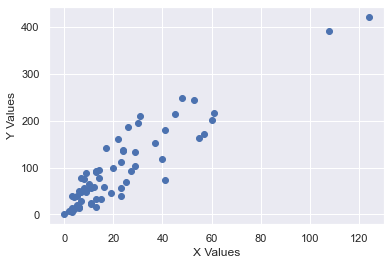

In [5]:
plt.scatter(x1,y)
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.show()

# Defining the x constant

In [6]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     305.0
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           2.05e-25
Time:                        10:12:57   Log-Likelihood:                -314.04
No. Observations:                  63   AIC:                             632.1
Df Residuals:                      61   BIC:                             636.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9945      6.368      3.140      0.003       7.261      32.728
x              3.4138      0.195     17.465      0.000       3.023       3.805
==============================================================================
Omnibus:                        1.613   Durbin-Watson:                   1.199
Prob(Omnibus):                  0.446   Jarque-Bera (JB):                1.429
Skew:                           0.364   Prob(JB):                        0.489
Kurtosis:                       2.875   Cond. No.                         45.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

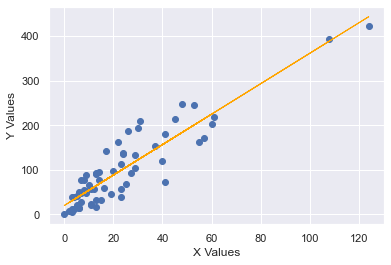

In [7]:
plt.scatter(x1,y)
yhat = 3.4138*x1 + 19.9945
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.plot(x1,yhat, lw=1, c='orange', label='Regression Line')
plt.show()

# Performing Logs to for better fits

C:\Users\Kyle\anaconda2\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


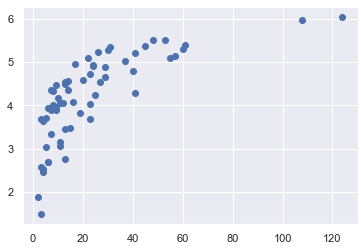

In [8]:
y = np.log(data['y'])
plt.scatter(x1,y)

# Taking the log of either y or x results in the semi_log model

# LOG-LOG model is the results of taking logs of both x and y models

In [9]:
x1 = np.log(data['x'])
y = np.log(data['y'])


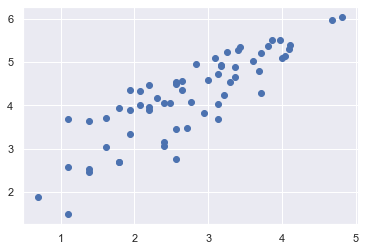

In [10]:
plt.scatter(x1,y)

In [11]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\Kyle\anaconda2\lib\site-packages\statsmodels\regression\linear_model.py:1666: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 21 Apr 2022   Prob (F-statistic):                nan
Time:                        10:12:58   Log-Likelihood:                    nan
No. Observations:                  63   AIC:                               nan
Df Residuals:                      63   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
x                 nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
x


,const,x
0,1.0,4.682131
1,1.0,2.944439
2,1.0,2.564949
3,1.0,4.820282
4,1.0,3.688879
...,...,...
58,1.0,2.197225
59,1.0,3.433987
60,1.0,2.639057
61,1.0,3.970292


In [25]:
ndata = pd.DataFrame({"const":1,'x':[49,124]})
ndata

,const,x
0,1,49
1,1,124


In [26]:
pred = result.predict(ndata)

In [27]:
pred

0    187.271840
1    443.308607
dtype: float64